In [1]:
import json
import pandas as pd

from datetime import datetime
from elasticsearch import Elasticsearch
es = Elasticsearch()

In [2]:
# Query parameters
k = 10000
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [3]:
# Ranker 1. Return all documents and order by id

res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(listing_url)s %(last_scraped)s %(name)s: %(overall_rating)s" % hit["_source"])

Got 10000 Hits:
1.0  https://www.airbnb.com/rooms/395975 2018-09-14 Steps to Beach, Bars and Downtown!: 5.0
1.0  https://www.airbnb.com/rooms/950046 2018-09-14 Spacious Apartment in Jamaica Plain: 4.833333333333333
1.0  https://www.airbnb.com/rooms/1301500 2018-09-14 A JP gem steps from the Orange Line: 5.0
1.0  https://www.airbnb.com/rooms/3250739 2018-09-14 Umass,City,MGH,Longwood(BI,BWH)(D): 4.166666666666667
1.0  https://www.airbnb.com/rooms/3415434 2018-09-14 Umass, MGH, City,BCEC,Longwood 2B: 3.8333333333333335
1.0  https://www.airbnb.com/rooms/3420384 2018-09-14 Convient, Safe and Comfortable: 5.0
1.0  https://www.airbnb.com/rooms/3765014 2018-09-14 Umass,MGH,City,BCEC, Longwood(2c): 3.6666666666666665
1.0  https://www.airbnb.com/rooms/3827568 2018-09-14 Umass, MGH, Harvard, Longwood 2E: 3.75
1.0  https://www.airbnb.com/rooms/4387413 2018-09-14 Sunny Room next to Harvard Yard: 5.0
1.0  https://www.airbnb.com/rooms/4431210 2018-09-14 Umass, MGH, City,BCEC,Longwood 1B: 4.5
1.0  ht

1.0  https://www.airbnb.com/rooms/18672286 2017-10-06 Luxury Apartment in Modern Fort Point High Rise: 5.0
1.0  https://www.airbnb.com/rooms/10054194 2017-10-06 Luxury 1-BR Near Restaurants & Stores!: 4.5
1.0  https://www.airbnb.com/rooms/10054046 2017-10-06 Stunning 1-BR Boston Apartment by the Harbor: 4.833333333333333
1.0  https://www.airbnb.com/rooms/10052824 2017-10-06 Glamorous 3-Bedroom Apartment near Fort Point!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/20325539 2017-10-06 Stunning 1BD Seaport Apartment: 4.666666666666667
1.0  https://www.airbnb.com/rooms/10053032 2017-10-06 Lavish 3-BR High Rise Apt. in Boston!: 4.75
1.0  https://www.airbnb.com/rooms/10052622 2017-10-06 Lux Furnished 3BR Boston Apt In Financial District: 4.833333333333333
1.0  https://www.airbnb.com/rooms/10050351 2017-10-06 Beautifully Furnished 1BR Apt. On Boston Harbor: 4.833333333333333
1.0  https://www.airbnb.com/rooms/18356839 2017-10-06 Luxurious 2BDR Seaport Apartment: 4.416666666666667
1.0 

1.0  https://www.airbnb.com/rooms/2633478 2016-09-07 Sleep on a Houseboat in Downtown!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/13298108 2016-09-07 Modern Apt, Heart of North End: 4.916666666666667
1.0  https://www.airbnb.com/rooms/13642397 2016-09-07 Cozy Nautical North End Apt: 5.0
1.0  https://www.airbnb.com/rooms/9610609 2016-09-07 Lodging at Boston Harbor (2 BR): 4.166666666666667
1.0  https://www.airbnb.com/rooms/14572511 2016-09-07 Cozy and Quiet North End Duplex 1 Bedroom: 5.0
1.0  https://www.airbnb.com/rooms/14429876 2016-09-07 Shared room in the heart of North End: 4.333333333333333
1.0  https://www.airbnb.com/rooms/5755910 2016-09-07 Boston/gym/family friendly: 5.0
1.0  https://www.airbnb.com/rooms/1758953 2016-09-07 North End - Little Italy: 4.833333333333333
1.0  https://www.airbnb.com/rooms/1094599 2016-09-07 Fabulous Houseboat in Downtown! : 4.916666666666667
1.0  https://www.airbnb.com/rooms/971393 2016-09-07 North End Studio - Private Roofdeck: 4.75
1.0  h

1.0  https://www.airbnb.com/rooms/6717173 2018-04-15 Private Room in Apt Near Fenway: 3.6666666666666665
1.0  https://www.airbnb.com/rooms/6749343 2018-04-15 large bedroom BU west: 4.666666666666667
1.0  https://www.airbnb.com/rooms/7080737 2018-04-15 HARVARD SQUARE Private Room: 4.583333333333333
1.0  https://www.airbnb.com/rooms/7147570 2018-04-15 A Place for Boston Memories!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/7179549 2018-04-15 2nd Fl, brownstone, European flair: 5.0
1.0  https://www.airbnb.com/rooms/7224317 2018-04-15 215sqft Room+bike MIT-HRVD Parking: 4.833333333333333
1.0  https://www.airbnb.com/rooms/7332266 2018-04-15 Sunny private room,Longwood, Fenway: 4.666666666666667
1.0  https://www.airbnb.com/rooms/7454474 2018-04-15 A room in the village. Room 6: 5.0
1.0  https://www.airbnb.com/rooms/7480676 2018-04-15 Luxurious en-suite bath by B.C #3: 4.916666666666667
1.0  https://www.airbnb.com/rooms/7491183 2018-04-15 Sunny apartment on great street: 4.8333333333

1.0  https://www.airbnb.com/rooms/29738352 2019-03-12 5 Private bedroom close Fenway & Downtown Boston: 5.0
1.0  https://www.airbnb.com/rooms/30017983 2019-03-12 Near Longwood Medical, Harvard Med, Free Cleaning: 4.0
1.0  https://www.airbnb.com/rooms/30066090 2019-03-12 Huge Private Master Bedroom in Charming Townhouse: 5.0
1.0  https://www.airbnb.com/rooms/30177783 2019-03-12 143-12 Contemporary Flat in Heart of the City!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/30197337 2019-03-12 1-1 Chic, Modern, Hip Studio Awaits Your Stay: 4.833333333333333
1.0  https://www.airbnb.com/rooms/30198849 2019-03-12 1-2 Chic, Modern, Hip Studio Awaits Your Stay: 4.75
1.0  https://www.airbnb.com/rooms/30245059 2019-03-12 Functional: 5.0
1.0  https://www.airbnb.com/rooms/30779621 2019-03-12 Lady Grace: 5.0
1.0  https://www.airbnb.com/rooms/31087814 2019-03-12 Comfortable room near the city :)): 4.666666666666667
1.0  https://www.airbnb.com/rooms/31101954 2019-03-12 (B) Simple room perfect for

1.0  https://www.airbnb.com/rooms/26995516 2019-04-15 GoLocal furnished studio in East Boston: 4.25
1.0  https://www.airbnb.com/rooms/27549840 2019-04-15 Boston Apartment: 4.916666666666667
1.0  https://www.airbnb.com/rooms/27566384 2019-04-15 62 Simple & elegant room luxurious house in Boston: 5.0
1.0  https://www.airbnb.com/rooms/27634301 2019-04-15 2 bed 1 bath walking distance to Newbury & Copley: 4.833333333333333
1.0  https://www.airbnb.com/rooms/27652295 2019-04-15 Best location, top comfort, private room IN Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/27653076 2019-04-15 The best location in Boston! Cute private room!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/27654558 2019-04-15 Charming, spacious, & private room in TOP location: 4.666666666666667
1.0  https://www.airbnb.com/rooms/27902607 2019-04-15 Boston Trip Awaits - 3 BDR, Sleeps 8, Stay Tonight: 4.75
1.0  https://www.airbnb.com/rooms/28025180 2019-04-15 WELL LOCATED APT by BU! 2Beds/1Bath+ 1 Park

1.0  https://www.airbnb.com/rooms/13531200 2019-07-14 Cozy room around Longwood Medical Area: 4.916666666666667
1.0  https://www.airbnb.com/rooms/13698137 2019-07-14 Prvt rm w/workspace+deck Historic Jamaica Plain: 4.833333333333333
1.0  https://www.airbnb.com/rooms/14191723 2019-07-14 Feel right at home! 1BR w/ Private Deck-Close to T: 4.916666666666667
1.0  https://www.airbnb.com/rooms/14260905 2019-07-14 Comfortable, convenient & affordable JP Apartment: 4.666666666666667
1.0  https://www.airbnb.com/rooms/14422439 2019-07-14 Beautiful Condo in Boston's Back Bay!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/14487262 2019-07-14 Sonder | The Continuum | Bright 2BR + Gym: 4.833333333333333
1.0  https://www.airbnb.com/rooms/14632821 2019-07-14 Private bedroom close to JFK, UMass, & Savin Hill.: 5.0
1.0  https://www.airbnb.com/rooms/15522020 2019-07-14 Newly Renovated 1BR Little Italy by Domio: 4.75
1.0  https://www.airbnb.com/rooms/15579760 2019-07-14 2 Bed & 2 Bath Luxury Apartm

1.0  https://www.airbnb.com/rooms/13670860 2019-09-22 Stylish Studio: 5.0
1.0  https://www.airbnb.com/rooms/13733887 2019-09-22 Comfy, spacious Boston home 3BR/2BA: 5.0
1.0  https://www.airbnb.com/rooms/13848277 2019-09-22 Cozy loft - best Boston location: 4.666666666666667
1.0  https://www.airbnb.com/rooms/14402688 2019-09-22 Cozy Brighton Apartment: 4.583333333333333
1.0  https://www.airbnb.com/rooms/14586440 2019-09-22 Beacon Hill Next To Statehouse In Downtown Boston: 4.333333333333333
1.0  https://www.airbnb.com/rooms/14670311 2019-09-22 Private room with shared bath in Boston brownstone: 5.0
1.0  https://www.airbnb.com/rooms/14685769 2019-09-22 Pretty room in Boston Brownstone with shared bath: 5.0
1.0  https://www.airbnb.com/rooms/14819274 2019-09-22 South End, Penthouse, Roof Deck w/Amazing Views!: 5.0
1.0  https://www.airbnb.com/rooms/15038186 2019-09-22 Groups! Two townhouses sleep 10: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15370847 2019-09-22 Bright and Cozy Bac

1.0  https://www.airbnb.com/rooms/13298014 2019-11-21 Single room available for month of July: 3.3333333333333335
1.0  https://www.airbnb.com/rooms/13299410 2019-11-21 Minutes to Red Line station, great for summer: 4.833333333333333
1.0  https://www.airbnb.com/rooms/13309117 2019-11-21 Beautiful townhouse w/ free parking: 4.333333333333333
1.0  https://www.airbnb.com/rooms/13325983 2019-11-21 Private 1 bed/ 1 bath near Red line (JFK/Umass): 4.333333333333333
1.0  https://www.airbnb.com/rooms/13334098 2019-11-21 3BR + Office Single Family in Jamaica Plain: 5.0
1.0  https://www.airbnb.com/rooms/13344433 2019-11-21 Sun filled modern master suite and separate den: 5.0
1.0  https://www.airbnb.com/rooms/13363171 2019-11-21 Colorful artist home, prime location!: 5.0
1.0  https://www.airbnb.com/rooms/13414367 2019-11-21 Quiet 1BR in the Heart of the North End: 4.916666666666667
1.0  https://www.airbnb.com/rooms/13433298 2019-11-21 Centrally located brownstone on historic Beacon St: 5.0
1.0  ht

1.0  https://www.airbnb.com/rooms/36978566 2019-12-04 JP Oasis: 4.833333333333333
1.0  https://www.airbnb.com/rooms/38090265 2019-12-04 Tiny 1 Bed - an affordable gem!: 5.0
1.0  https://www.airbnb.com/rooms/39003746 2019-12-04 Nice 2bd Apt Walk to Airport and T Station: 4.083333333333333
1.0  https://www.airbnb.com/rooms/39267907 2019-12-04 Modest, simple, private room in heart of Boston: 5.0
1.0  https://www.airbnb.com/rooms/39274561 2019-12-04 Modest, small and private room in Boston City.: 4.833333333333333
1.0  https://www.airbnb.com/rooms/39274768 2019-12-04 Modest, large, and convenient room in Boston: 4.333333333333333
1.0  https://www.airbnb.com/rooms/39275329 2019-12-04 Best spot in Boston, simple, cozy, private room.: 4.75
1.0  https://www.airbnb.com/rooms/39275473 2019-12-04 Best spot in Boston, small, and simple room: 4.916666666666667
1.0  https://www.airbnb.com/rooms/39275615 2019-12-04 Best spot in Boston, beautiful and private room: 4.833333333333333
1.0  https://www.ai

1.0  https://www.airbnb.com/rooms/27606556 2020-06-10 Amazing location!! Spacious 1 bedroom condo: 5.0
1.0  https://www.airbnb.com/rooms/27904192 2020-06-10 Large Comft. 2 Bedroom, Modern Buildg, Across MGH: 5.0
1.0  https://www.airbnb.com/rooms/27927966 2020-06-10 cozy room on third floor: 4.916666666666667
1.0  https://www.airbnb.com/rooms/28126102 2020-06-10 ★Hidden Gem 6BR w/3.5BA★ Close to Transportation: 4.666666666666667
1.0  https://www.airbnb.com/rooms/28161172 2020-06-10 Room w/ Private Bathroom, near MBTA transit: 4.666666666666667
1.0  https://www.airbnb.com/rooms/28306371 2020-06-10 Entire Apartment-South End/Back Bay/Downtown: 4.916666666666667
1.0  https://www.airbnb.com/rooms/28517787 2020-06-10 Renovated, Sleeps 6,Victorian Home,BU, BC, MBTA: 5.0
1.0  https://www.airbnb.com/rooms/28612032 2020-06-10 Roofdeck * Instaworthy Decor * Fast Wifi: 5.0
1.0  https://www.airbnb.com/rooms/28614084 2020-06-10 Quiet ★ BC, BU, Harvard, Longwood ★ FREE Parking: 4.916666666666667
1.0 

In [4]:
res

{'took': 1092,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'airbnb_history_boston',
    '_type': '_doc',
    '_id': '395975',
    '_score': 1.0,
    '_source': {'listing_url': 'https://www.airbnb.com/rooms/395975',
     'scrape_id': 20180914083753,
     'last_scraped': '2018-09-14',
     'name': 'Steps to Beach, Bars and Downtown!',
     'host_id': 1931881,
     'price': 88.0,
     'availability_30': 1,
     'availability_60': 1,
     'availability_90': 1,
     'availability_365': 259,
     'number_of_reviews': 24,
     'first_review': '2014-08-14',
     'last_review': '2018-08-12',
     'review_scores_rating': 97.0,
     'review_scores_accuracy': 10.0,
     'review_scores_cleanliness': 10.0,
     'review_scores_checkin': 10.0,
     'review_scores_communication': 10.0,
     'review_scores_location': 10.0,
     'review_scores_value': 10.0,
    

In [5]:
type(res)

dict

In [6]:
pd.DataFrame.from_dict(res, orient='index')

,0
took,1092
timed_out,False
_shards,"{'total': 1, 'successful': 1, 'skipped': 0, 'f..."
hits,"{'total': {'value': 10000, 'relation': 'gte'},..."


In [7]:
df = pd.json_normalize(res['hits']['hits'])

In [8]:
df

,_index,_type,_id,_score,_source.listing_url,_source.scrape_id,_source.last_scraped,_source.name,_source.host_id,_source.price,...,_source.first_review,_source.last_review,_source.review_scores_rating,_source.review_scores_accuracy,_source.review_scores_cleanliness,_source.review_scores_checkin,_source.review_scores_communication,_source.review_scores_location,_source.review_scores_value,_source.overall_rating
0,airbnb_history_boston,_doc,395975,1.0,https://www.airbnb.com/rooms/395975,20180914083753,2018-09-14,"Steps to Beach, Bars and Downtown!",1931881,88.0,...,2014-08-14,2018-08-12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
1,airbnb_history_boston,_doc,950046,1.0,https://www.airbnb.com/rooms/950046,20180914083753,2018-09-14,Spacious Apartment in Jamaica Plain,5153431,250.0,...,2013-07-24,2016-08-06,90.0,9.0,10.0,9.0,10.0,10.0,10.0,4.833333
2,airbnb_history_boston,_doc,1301500,1.0,https://www.airbnb.com/rooms/1301500,20180914083753,2018-09-14,A JP gem steps from the Orange Line,3578624,79.0,...,2015-10-12,2018-06-18,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
3,airbnb_history_boston,_doc,3250739,1.0,https://www.airbnb.com/rooms/3250739,20180914083753,2018-09-14,"Umass,City,MGH,Longwood(BI,BWH)(D)",16442921,65.0,...,2014-07-02,2018-08-15,74.0,8.0,7.0,9.0,9.0,9.0,8.0,4.166667
4,airbnb_history_boston,_doc,3415434,1.0,https://www.airbnb.com/rooms/3415434,20180914083753,2018-09-14,"Umass, MGH, City,BCEC,Longwood 2B",16442921,63.0,...,2014-09-07,2016-10-08,73.0,8.0,6.0,8.0,8.0,8.0,8.0,3.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,airbnb_history_boston,_doc,5478135,1.0,https://www.airbnb.com/rooms/5478135,20201024170420,2020-10-24,City living near the beach!,13595892,195.0,...,2016-04-19,2016-11-13,97.0,10.0,10.0,10.0,10.0,9.0,10.0,4.916667
9996,airbnb_history_boston,_doc,5495267,1.0,https://www.airbnb.com/rooms/5495267,20201024170420,2020-10-24,Parking Renovated Close to Downtown,18517776,36.0,...,2016-07-31,2016-08-30,100.0,10.0,10.0,10.0,10.0,9.0,10.0,4.916667
9997,airbnb_history_boston,_doc,5511911,1.0,https://www.airbnb.com/rooms/5511911,20201024170420,2020-10-24,"Bright, Spacious Loft in North End",25079218,240.0,...,2015-06-29,2015-06-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
9998,airbnb_history_boston,_doc,5526487,1.0,https://www.airbnb.com/rooms/5526487,20201024170420,2020-10-24,$159 Special! *Penthouse Duplex* Close to Center,28662210,289.0,...,2015-06-08,2019-12-25,97.0,10.0,10.0,10.0,10.0,9.0,10.0,4.916667


In [9]:
len(df)

10000

In [16]:
df['_source.last_scraped'].value_counts().sort_index(ascending=True)

2015-10-03     680
2016-09-07     844
2017-10-06     597
2018-04-14      50
2018-04-15     509
2018-05-17     313
2018-05-18      28
2018-07-18     231
2018-08-17     293
2018-09-14     159
2018-10-11     199
2018-11-17     230
2018-12-13     193
2019-01-17     146
2019-02-09     152
2019-03-12     209
2019-04-15     199
2019-05-19     212
2019-06-14     216
2019-07-14     235
2019-08-19     609
2019-09-22     208
2019-10-18     130
2019-10-19     311
2019-11-21    1171
2019-12-04     125
2020-01-05      94
2020-02-13     207
2020-03-16     104
2020-04-14     207
2020-05-12      94
2020-05-13      84
2020-06-10     386
2020-07-11      13
2020-08-31      60
2020-09-01      43
2020-09-28     172
2020-09-29      43
2020-10-24     244
Name: _source.last_scraped, dtype: int64

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'date')

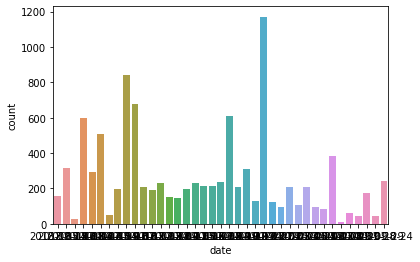

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(df['_source.last_scraped'])
plt.xlabel('date')

In [73]:
from elasticsearch.helpers import scan

res = scan(
    es,
    index=index_name,
    query={"query": { "match_all" : {}}}
)

In [74]:
data = list(res)

In [75]:
len(data)

12097

In [76]:
data[0]

{'_index': 'airbnb_history_boston',
 '_type': '_doc',
 '_id': '395975',
 '_score': None,
 '_source': {'listing_url': 'https://www.airbnb.com/rooms/395975',
  'scrape_id': 20180914083753,
  'last_scraped': '2018-09-14',
  'name': 'Steps to Beach, Bars and Downtown!',
  'host_id': 1931881,
  'price': 88.0,
  'availability_30': 1,
  'availability_60': 1,
  'availability_90': 1,
  'availability_365': 259,
  'number_of_reviews': 24,
  'first_review': '2014-08-14',
  'last_review': '2018-08-12',
  'review_scores_rating': 97.0,
  'review_scores_accuracy': 10.0,
  'review_scores_cleanliness': 10.0,
  'review_scores_checkin': 10.0,
  'review_scores_communication': 10.0,
  'review_scores_location': 10.0,
  'review_scores_value': 10.0,
  'overall_rating': 5.0},
 'sort': [83]}

In [78]:

# appending rows 
docs = []
for item in data:  
    doc = {
        'id': item['_id'],
        'index': item['_index'],
        'listing_url': item['_source']['listing_url'],
        'scrape_id': item['_source']['scrape_id'],
        'last_scraped': item['_source']['last_scraped'],
        'name': item['_source']['name'],
        'host_id': item['_source']['host_id'],
        'price': item['_source']['price'],
        'availability_30': item['_source']['availability_30'],
        'availability_60': item['_source']['availability_60'],
        'availability_90': item['_source']['availability_90'],
        'availability_365': item['_source']['availability_365'],
        'first_review': item['_source']['first_review'],
        'last_review': item['_source']['last_review'],
        'review_scores_rating': item['_source']['review_scores_rating'],
        'review_scores_accuracy': item['_source']['review_scores_accuracy'],
        'review_scores_cleanliness': item['_source']['review_scores_cleanliness'],
        'review_scores_checkin': item['_source']['review_scores_checkin'],
        'review_scores_communication': item['_source']['review_scores_communication'],
        'review_scores_location': item['_source']['review_scores_location'],
        'review_scores_value': item['_source']['review_scores_value'],
        'overall_rating': item['_source']['overall_rating']
    }
    
    docs.append(doc) 

In [79]:
df = pd.DataFrame(docs)

In [80]:
df.head()

,id,index,listing_url,scrape_id,last_scraped,name,host_id,price,availability_30,availability_60,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,overall_rating
0,395975,airbnb_history_boston,https://www.airbnb.com/rooms/395975,20180914083753,2018-09-14,"Steps to Beach, Bars and Downtown!",1931881,88.0,1,1,...,2014-08-14,2018-08-12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
1,950046,airbnb_history_boston,https://www.airbnb.com/rooms/950046,20180914083753,2018-09-14,Spacious Apartment in Jamaica Plain,5153431,250.0,30,60,...,2013-07-24,2016-08-06,90.0,9.0,10.0,9.0,10.0,10.0,10.0,4.833333
2,1301500,airbnb_history_boston,https://www.airbnb.com/rooms/1301500,20180914083753,2018-09-14,A JP gem steps from the Orange Line,3578624,79.0,0,0,...,2015-10-12,2018-06-18,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
3,3250739,airbnb_history_boston,https://www.airbnb.com/rooms/3250739,20180914083753,2018-09-14,"Umass,City,MGH,Longwood(BI,BWH)(D)",16442921,65.0,13,43,...,2014-07-02,2018-08-15,74.0,8.0,7.0,9.0,9.0,9.0,8.0,4.166667
4,3415434,airbnb_history_boston,https://www.airbnb.com/rooms/3415434,20180914083753,2018-09-14,"Umass, MGH, City,BCEC,Longwood 2B",16442921,63.0,21,51,...,2014-09-07,2016-10-08,73.0,8.0,6.0,8.0,8.0,8.0,8.0,3.833333


In [81]:
df.shape

(12097, 22)

In [82]:
df['last_scraped'].value_counts().sort_index(ascending=True)

2015-10-03     680
2016-09-07     844
2017-10-06     597
2018-04-14      50
2018-04-15     509
2018-05-17     313
2018-05-18      28
2018-07-18     231
2018-08-17     293
2018-09-14     159
2018-10-11     199
2018-11-17     230
2018-12-13     193
2019-01-17     146
2019-02-09     152
2019-03-12     209
2019-04-15     199
2019-05-19     212
2019-06-14     216
2019-07-14     235
2019-08-19     609
2019-09-22     208
2019-10-18     130
2019-10-19     311
2019-11-21    1171
2019-12-04     125
2020-01-05      94
2020-02-13     207
2020-03-16     104
2020-04-14     207
2020-05-12      94
2020-05-13      84
2020-06-10     386
2020-07-11      13
2020-08-31      60
2020-09-01      43
2020-09-28     172
2020-09-29      43
2020-10-24    2341
Name: last_scraped, dtype: int64

In [84]:
len(df[df['last_scraped'] == '2020-09-29'])

43